## Die Binomialverteilung
----------------------------------------

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import binom

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Die Binomialverteilung ist die **Wahrscheinlichkeitsverteilung** für die Anzahl der Erfolge in einer Folge von **Bernoulli-Versuchen** ({cite:p}`Papula2011` s.350).

### Die binomische Wahrscheinlichkeitsformel

Bei $n$ Bernoulli-Versuchen ist die Anzahl der Ergebnisse, die genau $x$ Erfolge enthalten, gleich dem Binomialkoeffizienten ${n \choose x}$ ({cite:p}`fahrmeirstatistik` s.188).

$X$ sei die Gesamtzahl der Erfolge in $n$ Bernoulli-Versuchen mit der Erfolgswahrscheinlichkeit $p$. Dann ist die Wahrscheinlichkeitsverteilung der Zufallsvariablen $X$ gegeben durch:

$$P(X = x) = {n \choose x}p^x(1 - p)^{n-x}, \qquad x = 0, 1, 2, \dots , n$$

Die Zufallsvariable $X$ wird als **Binomialzufallsvariable** bezeichnet und folgt der Binomialverteilung mit den Parametern $n$ und $p$ ({cite:p}`Papula2011` s.356).

Betrachten wir ein Beispiel aus der realen Welt.

Langzeitstatistiken besagen, dass die Chance, die Abschlussprüfung in Statistik zu bestehen, bei $0,3$ liegt. Ja, etwa $70 \%$ der Studenten fallen in der Statistikprüfung durch! Übrigens, wenn Sie dieses E-Learning-Modul absolvieren, werden Ihre Chancen, die Abschlussprüfung zu bestehen, definitiv steigen :-)

Betrachten wir eine Klasse mit $25$ Studenten. Wie hoch ist die Wahrscheinlichkeit, dass genau $3$ der Studenten dieser Klasse die Abschlussprüfung in Statistik bestehen werden? Oder anders ausgedrückt: $P(X=3)$. Auch hier beginnen wir mit der Implementierung eines naiven Ansatzes in Python.

In [2]:
# Anzahl der Studenten
n = 25
# Erfolgswahrscheinlichkeit
p = 0.3
# Anzahl der Studenten die die Prüfung bestehen
k = 3

math.comb(n,k)*p**(k)*(1-p)**(n-k)

0.02427998871170032

Wow, die Wahrscheinlichkeit, dass genau $3$ von $25$ Studierenden $(P(X=3))$ die Abschlussprüfung in Statistik bestehen, ist ziemlich gering. Wie sieht es mit der Wahrscheinlichkeit aus, dass genau $15$ von $25$ Studierenden $(P(X=15))$ die Abschlussprüfung in Statistik bestehen werden? Wir wenden uns an Python.

In [3]:
# Anzahl der Studenten
n = 25
# Erfolgswahrscheinlichkeit
p = 0.3
# Anzahl der Studenten die die Prüfung bestehen
k = 15

math.comb(n,k)*p**(k)*(1-p)**(n-k)

0.0013248974242351928

Die Wahrscheinlichkeit von $P(X=15)$ beträgt etwa $0,1 \%$. Wir könnten mit unseren Experimenten fortfahren, um alle Wahrscheinlichkeiten für **genau ein Ergebnis** für $k=0,1,2, \dots ,n$ herauszufinden. Bitte beachten Sie allerdings, dass es für unser spezielles Beispiel nicht sehr informativ ist, die Wahrscheinlichkeit für das Bestehen der Prüfung für genau eine bestimmte Anzahl $(k)$ von Studenten zu kennen. Für uns ist es von größerem Informationsinteresse, wenn wir die Frage beantworten könnten, wie hoch die Wahrscheinlichkeit ist, dass $k$ oder weniger Studierende $(P(X \le k))$ die Prüfung bestehen, oder, was ebenso interessant ist, dass $k$ oder mehr Studierende $(P(X \ge k))$ die Prüfung bestehen.

Als Übung wenden wir uns an Python und bestimmen die Wahrscheinlichkeit, dass $9$ oder weniger Studierende die Abschlussprüfung in Statistik bestehen $(P(X \le 9))$. Wir interessieren uns also für die Wahrscheinlichkeit, dass $0$ von $25 \ $,$ \ 1$ von $25 \ $,$ \ 2$ von $25 \ $,$ \ ...$ oder $9$ von $25$ Studierenden die Prüfung bestehen. Um diese Wahrscheinlichkeit zu berechnen, können wir unseren naiven Ansatz erweitern und Folgendes berechnen

$P(X = 0)+P(X = 1)+P(X = 2)+ \dots+P(X = 9)$

In [4]:
# Anzahl der Studenten
n = 25
# Erfolgswahrscheinlichkeit
p = 0.3
# Anzahl der maximalen Erfolge
k = 9

prob = 0
prob_total = 0

# Erzeuge for-loop
for i in range(k+1):
    prob = math.comb(n,i)*p**(i)*(1-p)**(n-i)
    prob_total += prob
prob_total

0.8105639764950532

Die Wahrscheinlichkeit, dass $9$ oder weniger Studierende die Statistikprüfung bestehen $(P(X≤9))$, beträgt $81,1 \%$. Das wiederum bedeutet, dass die Wahrscheinlichkeit, dass $10$ oder mehr Studierende die Prüfung bestehen, $P(X>9)=1-P(X≤9)$ oder nur $18,9 \%$ beträgt.

Neben der ehrlich gesagt recht unangenehmen Einsicht in die Statistik des Bestehens der Abschlussprüfung ist es klar, dass die naive Implementierung von oben ziemlich mühsam ist. Deshalb führen wir die eingebauten Funktionen `binom.pmf()` und `binom.cdf()` ein.

Die Verwendung von `binom.pmf()` ist wie folgt: `binom.pmf(k, n, p, loc)`. Wir lassen vorerst das Argument `loc` außer Acht. Somit vereinfacht sich die Funktion `binom.pmf()` zu `binom.pmf(k, n, p)`, wobei $k$ den insgesamten Erfolgen, $n$ der Gesamtanzahl und $p$ der Wahrscheinlichkeit für das Bestehen der Prüfung entspricht. Um zu überprüfen, ob die Funktion `binom.pmf()` wie erwartet funktioniert, erinnern wir uns an unsere Testbeispiele von oben, nämlich $P(X=3)$ und $P(X=15)$.

In [5]:
binom.pmf(3, 25, 0.3) 

0.024279988711700378

In [6]:
binom.pmf(15, 25, 0.3)

0.0013248974242351943

Vergleichen Sie diese Ergebnisse mit den Ergebnissen unserer naiven Implementierung (scrollen Sie nach oben). Die Zahlen sollten übereinstimmen.

Die Funktion `binom.pmf()`  ist sehr praktisch, wenn wir Wahrscheinlichkeiten akkumulieren wollen, wie z. B. $P(X≤x)$ oder $P(X>x)$, denn wir können eine for - Schleife für das Argument $x$ angeben und anschließend summieren. Betrachten wir das Beispiel von oben $(P(X≤9))$.

In [7]:
P_le9=[]
for i in range(10):
    P_le9.append(binom.pmf(i, 25, 0.3))
P_le = sum(P_le9)
P_le

0.8105639764950541

Eine weitere eingebaute Funktion, die für die Beantwortung von $P(X≤9)$ geeignet ist, ist die Funktion `binom.pdf()`, die die Verteilungsfunktion zurückgibt. Die Funktion `binom.cdf()` berechnet die kumulative Wahrscheinlichkeitsverteilung und ist insofern praktisch, da wir auf den Aufruf der Summenfunktion verzichten können. Die Verwendung von `binom.cdf()` ist wie folgt: 

`binom.cdf(k, n, p, loc)`. Auch hier lassen wir das Argument `loc` außer Acht und belassen es bei `binom.cdf(k, n, p)`. Zusätzlich zu den Argumenten der Funktion `binom.cdf()` gilt zu beachten, dass `binom.cdf()`  die Wahrscheinlichkeiten $P(X≤x)$ wiedergibt und `binom.sf(k, n, p)` $P(X>x)$ die Gegenwahrscheinlichkeit `1-binom.cdf()`.

Um dies zu verdeutlichen, lassen Sie uns $P(X≤9)$ neu berechnen. Das Ergebnis der obigen Berechnung war $0,81056$. Nun wenden wir die Funktion `binom.cdf()` an, um das gleiche Ergebnis zu erhalten.

In [8]:
binom.cdf(9, 25, 0.3)

0.8105639764950546

Um $P(X>9)$ zu erhalten, was dasselbe ist wie $1-P(X≤9)$, setzen wir das Argument

In [9]:
binom.sf(9, 25, 0.3)

0.18943602350494537

In [10]:
1-binom.cdf(9, 25, 0.3)

0.18943602350494537

Um die **binomische Wahrscheinlichkeitsverteilung** zu visualisieren, verwenden wir die Funktion `binom.rvs()`, die Zufallsabweichungen für eine Binomialverteilung erzeugt, die durch ihre Größe $n$ und die Erfolgs-/Misserfolgswahrscheinlichkeit $p$ definiert ist.

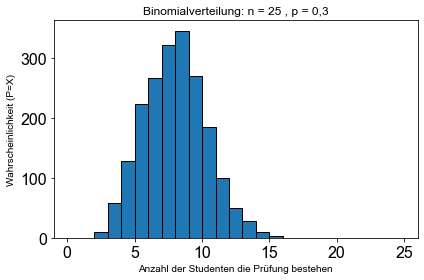

In [11]:
# Setze random seed für Reproduzierbarkeit
np.random.seed(seed=42)

# Erzeuge y-Werte der Binomialverteilung
y = []
for i in range(2000):
    y.append(binom.rvs(25,0.3))
bins = max(y)-min(y)

# Erzeuge Plot
fig, ax1 = plt.subplots()

plt.xlim(-1,26)
ax1.set_title('Binomialverteilung: n = 25 , p = 0,3')
ax1.set_xlabel('Anzahl der Studenten die Prüfung bestehen')
ax1.set_ylabel('Wahrscheinlichkeit (P=X)')
ax1.hist(y,bins, edgecolor='k')
ax1.tick_params(axis='y') 
ax1.tick_params(axis='y')

fig.tight_layout()

plt.show()

Zusätzlich visualisieren wir die oben diskutierten Wahrscheinlichkeiten: $P(X=3), P(X=15), P(X≤9), P(X>9)$ und die entsprechende **kumulative binomiale Wahrscheinlichkeitsverteilungsfunktion**.

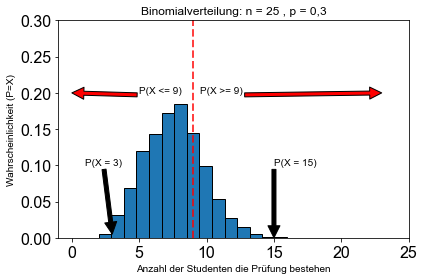

In [12]:
# Setze random seed für Reproduzierbarkeit
np.random.seed(seed=42)

# Erzeuge y-Werte der Binomialverteilung
y = []
for i in range(2000):
    y.append(binom.rvs(25,0.3))
    
bins = 15

fig, ax1 = plt.subplots()

#plt.xlim(-1,26)
ax1.set_title('Binomialverteilung: n = 25 , p = 0,3')
ax1.set_xlabel('Anzahl der Studenten die Prüfung bestehen')
ax1.set_ylabel('Wahrscheinlichkeit (P=X)')
ax1.hist(y,bins, edgecolor='k',density = True)
ax1.tick_params(axis='y') 
ax1.tick_params(axis='x') 
ax1.axvline(9, color ='red', lw = 2, linestyle = '--', alpha = 0.75)

# Annotation
ax1.annotate('P(X >= 9)', xy=(23, 0.2),  xycoords='data',
            xytext=(9.5, 0.2), textcoords='data',
            arrowprops=dict(facecolor='red', shrink=0.0005))
ax1.annotate('P(X <= 9)', xy=(0, 0.2),  xycoords='data',
            xytext=(5, 0.2), textcoords='data',
            arrowprops=dict(facecolor='red', shrink=0.0005))
ax1.annotate('P(X = 15)', xy=(15, 0),  xycoords='data',
            xytext=(15, 0.1), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.0005))
ax1.annotate('P(X = 3)', xy=(3, 0.005),  xycoords='data',
            xytext=(1, 0.1), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.0005))

ax1.set(xlim=(-1,25), ylim=(0,0.3))
fig.tight_layout()
plt.show()

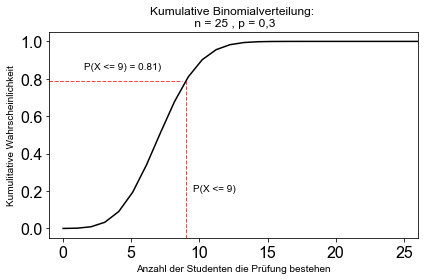

In [13]:
# Erzeuge x und y Werte für kumulitative Wahrscheinlichkeit
x = np.linspace(0, 50, num=50)  
y_cdf  = binom.cdf(x, 25,0.3) 

fig, ax1 = plt.subplots(sharex=True,sharey=True)

plt.xlim(-1,26)
ax1.set_title('Kumulative Binomialverteilung: \n n = 25 , p = 0,3')
ax1.set_xlabel('Anzahl der Studenten die Prüfung bestehen')
ax1.tick_params(axis='y')
ax1.set_ylabel('Kumulitative Wahrscheinlichkeit')  
ax1.plot(x, y_cdf, color = 'k')
ax1.tick_params(axis='y')
ax1.axvline(9,0,0.77, color ='red', lw = 1, alpha = 0.75,linestyle ='--')
ax1.axhline(y=0.79,xmin=0,xmax=0.36, color ='red', lw = 1, alpha = 0.75,linestyle ='--')

# Annotations
ax1.annotate('P(X <= 9)', xy=(9.5, 0.2),  xycoords='data',
            xytext=(9.5, 0.2), textcoords='data')
ax1.annotate('P(X <= 9) = 0.81)', xy=(1.5, 0.85),  xycoords='data',
            xytext=(1.5, 0.85), textcoords='data')

fig.tight_layout()

plt.show() 

Zum Abschluss dieses Abschnitts und um Ihnen ein Gefühl für die Formen der verschiedenen binomischen Wahrscheinlichkeitsverteilungen zu vermitteln, werden im Folgenden drei verschiedene binomische Wahrscheinlichkeitsverteilungen und die entsprechenden kumulativen binomischen Beweisbarkeitsverteilungen für $p=0,1, p=0,5$ und $p=0,9$ angegeben.

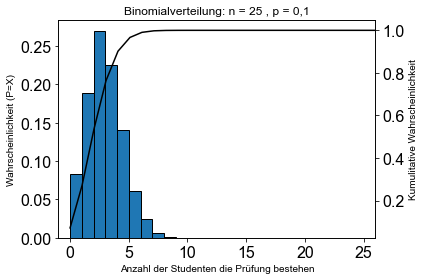

In [14]:
y = []
for i in range(2000):
    y.append(binom.rvs(25,0.1))
bins = max(y)-min(y)

y_cdf  = binom.cdf(x, 25,0.1) 

fig, ax1 = plt.subplots(sharex=True,sharey=True)
plt.xlim(-1,26)

ax1.set_title('Binomialverteilung: n = 25 , p = 0,1')
ax1.set_xlabel('Anzahl der Studenten die Prüfung bestehen')
ax1.set_ylabel('Wahrscheinlichkeit (P=X)')
ax1.hist(y,bins,edgecolor='k',density=True)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  
ax2.set_ylabel('Kumulitative Wahrscheinlichkeit')  
ax2.plot(x,y_cdf, color='k')
ax2.tick_params(axis='y')

fig.tight_layout()

plt.show() 

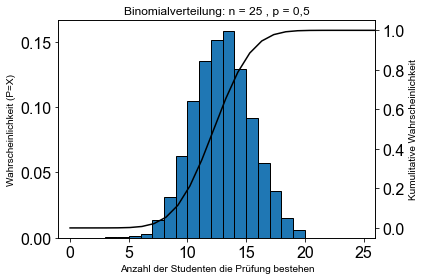

In [15]:
y = []
for i in range(2000):
    y.append(binom.rvs(25,0.5))
bins = max(y)-min(y)

y_cdf  = binom.cdf(x, 25,0.5) 

fig, ax1 = plt.subplots(sharex=True,sharey=True)
plt.xlim(-1,26)

#fig.add_subplot(111)
ax1.set_title('Binomialverteilung: n = 25 , p = 0,5')
ax1.set_xlabel('Anzahl der Studenten die Prüfung bestehen')
ax1.set_ylabel('Wahrscheinlichkeit (P=X)')
ax1.hist(y,bins,edgecolor='k',density = True)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 
ax2.set_ylabel('Kumulitative Wahrscheinlichkeit')  
ax2.plot(x, y_cdf, color='k')


fig.tight_layout()

plt.show() 

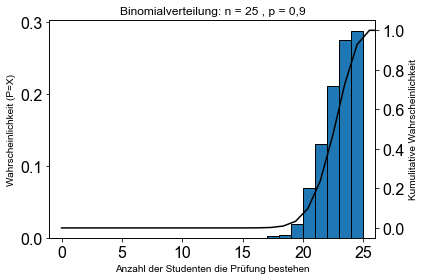

In [16]:
y = []
for i in range(2000):
    y.append(binom.rvs(25,0.9))
bins = max(y)-min(y)

y_cdf  = binom.cdf(x, 25,0.9) 

fig, ax1 = plt.subplots(sharex=True,sharey=True)
plt.xlim(-1,26)

#fig.add_subplot(111)
ax1.set_title('Binomialverteilung: n = 25 , p = 0,9')
ax1.set_xlabel('Anzahl der Studenten die Prüfung bestehen')
ax1.set_ylabel('Wahrscheinlichkeit (P=X)')
ax1.hist(y,bins,edgecolor='k',density = True)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 
ax2.set_ylabel('Kumulitative Wahrscheinlichkeit')  
ax2.plot(x, y_cdf, color='k')


fig.tight_layout()

plt.show() 